# Predict whether income exceeds $50K/yr - 1994 Census Income Dataset

<p><img src='https://i1.wp.com/files.agro20.com.br/uploads/2019/11/censo-1.jpg?fit=1024%2C587&ssl=1'/></p>
<p>O objetivo deste projeto é, a partir dos dados do Censo de 1994 dos Estados Unidos, predizer se uma pessoa ganha mais de 50K por ano. Os dados que vamos utilizar foram extraídos do <strong>UCI Machine Learning Repository</strong> e podem ser acessados clicando <a href="https://archive.ics.uci.edu/ml/datasets/Census+Income">aqui</a>.</p>

<p>Primeiramente, faremos uma análise exploratória para obter um entendimento melhor dos dados e como estão distribuidos. Será feita a limpeza e a visualização dos dados. Por fim, a criação de modelos de Machine Learning para alcançar o objetivo final.</p>

<p> Os dados estão divididos nos seguintes arquivos:</p>
<ol>
<li><code>data/adult.data</code> contém os dados para treino.</li>
<li><code>data/adult.test</code> contém os dados para teste.</li>
<li><code>data/adult.names</code> contem detalhes sobre os dados.</li>
</ol>


## 1. Import Libs and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
            'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

df_train = pd.read_csv('data/adult.data', names=columns)
df_test = pd.read_csv('data/adult.test', names=columns, skiprows=1)
df = pd.concat([df_train, df_test], ignore_index=True)

## 2. Análise exploratória

### Interpretação dos dados

Legenda dos atributos:
- age: idade de um indivíduo.
- workclass: status de emprego.
- fnlwgt (peso final): número de pessoas que o perfil representa.
- education: maior nível de educação alcançado pelo indivíduo.
- education-num: maior nível de educação alcançado representado numericamente.
- marital-status: estado civíl.
- occupation: tipo de ocupação do indivíduo.
- relationship: o que o indivíduo é em relação aos outros (marido, esposa, etc.)
- race: raça do indivíduo.
- sex: sexo biológico.
- capital-gain: ganho de renda.
- capital-loss: perda de renda
- hours-per-week: horas trabalhadas por semana.
- native-country: país de origem do indivíduo.
- label: se o indivíduo ganha mais ou menos de 50K.

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Limpeza

Procurando irregularidades nos dados categóricos.

In [7]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for feature in categorical_features:
    print(f"{feature}: {df[feature].unique()} \n")

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex: [' Male' ' Female'] 

native-country: [' United-States' ' Cuba'

Procurando irregularidades no target.

In [8]:
df['target'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [9]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [10]:
df.shape

(48842, 15)

In [11]:
# drop duplicates and reset index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(48813, 15)

In [12]:
# remove missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df.shape

(45194, 15)

In [13]:
# treat target values
df['target'] = [0 if (label == '<=50K' or label == '<=50K.') else 1 for label in df['target']]
df['target'].unique()

array([0, 1], dtype=int64)

### Visualização

#### Distribuição das classes

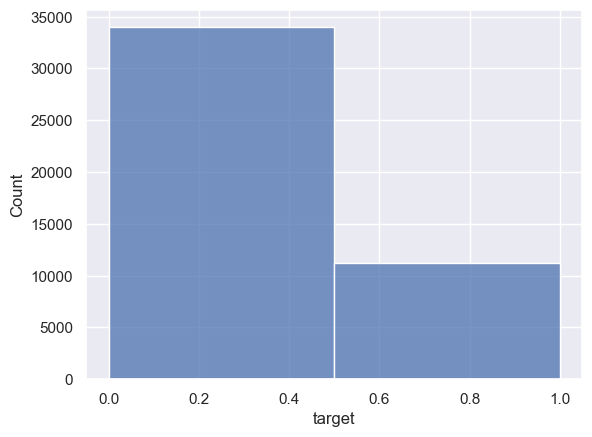

In [14]:
sns.set()
sns.histplot(data=df, x='target', bins=2)
plt.show()

#### Distribuição de horas trabalhadas por semana

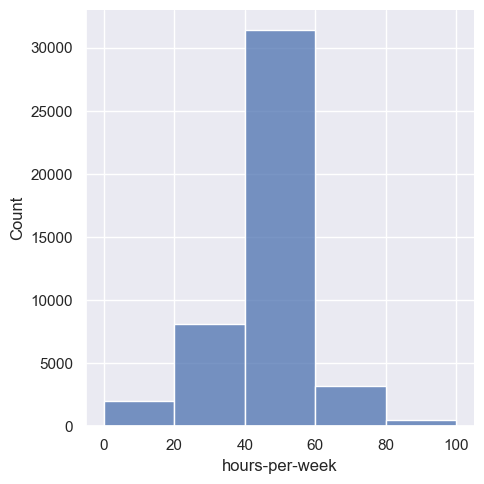

In [15]:
sns.displot(data=df, x='hours-per-week', kind='hist', bins=[0,20, 40, 60, 80,100])
plt.show()

#### Distribuição de idades com base nas classes

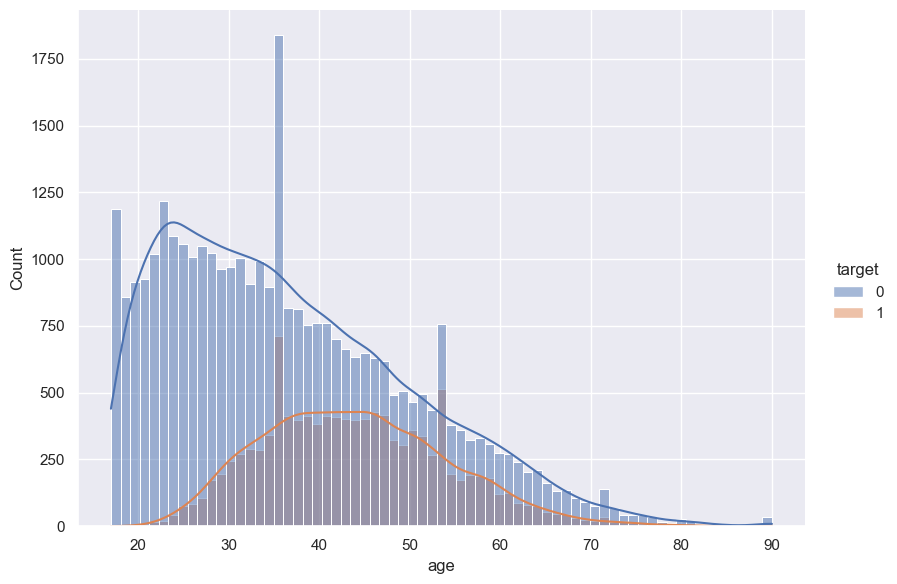

In [16]:
sns.displot(data=df, x='age', kind='hist', hue='target', kde=True, height=6, aspect=1.4)
plt.show()

#### Educação vs Target

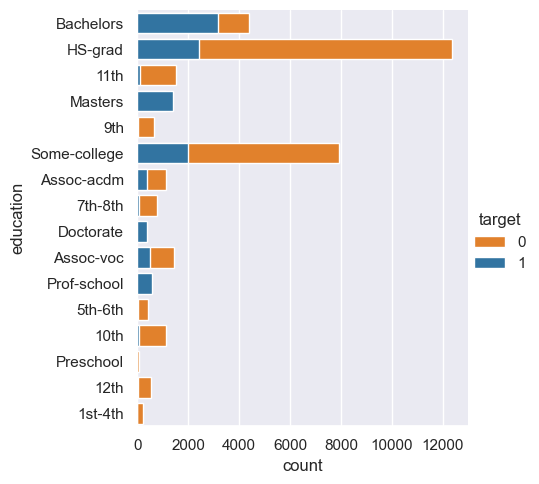

In [17]:
sns.catplot(data=df, y='education', hue='target', kind='count', palette=['#FF7F0E', '#1F77B4'], dodge=False)
plt.show()

#### Situação de emprego vs Target

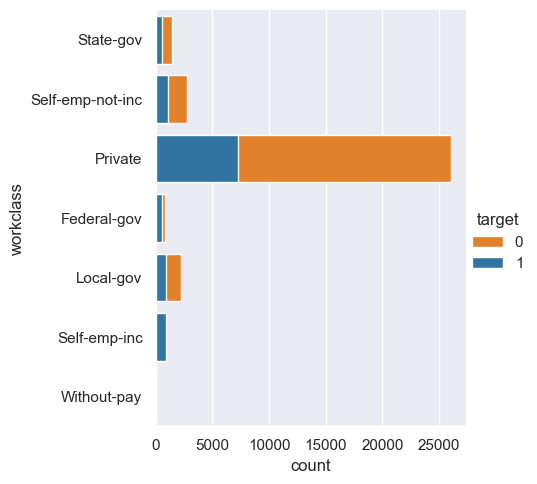

In [18]:
sns.catplot(data=df, y='workclass', hue='target', kind='count', palette=['#FF7F0E', '#1F77B4'], dodge=False)
plt.show()

#### Ocupação vs Target

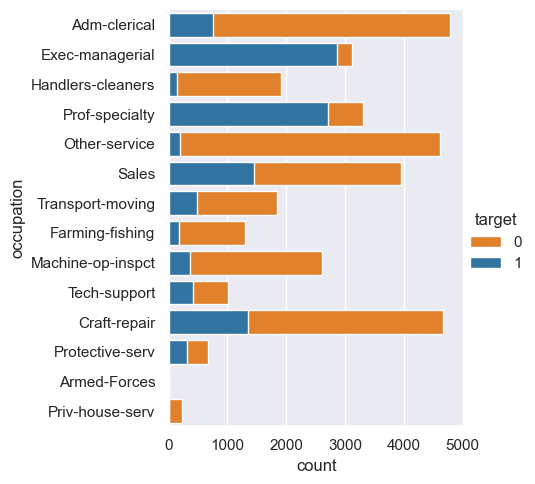

In [19]:
sns.catplot(data=df, y='occupation', hue='target', kind='count', palette=['#FF7F0E', '#1F77B4'], dodge=False)
plt.show()

#### Raça vs Target

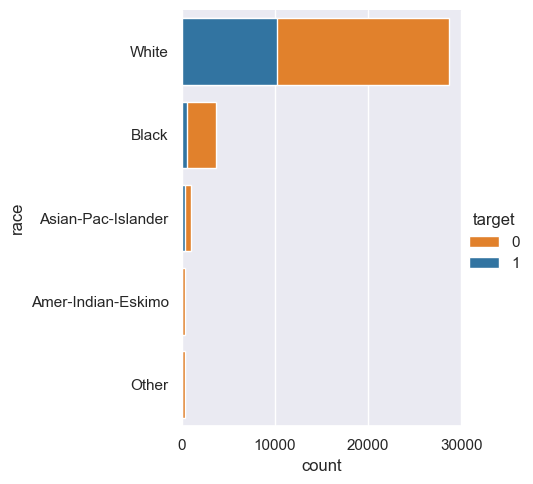

In [20]:
sns.catplot(data=df, y='race', hue='target', kind='count', palette=['#FF7F0E', '#1F77B4'], dodge=False)
plt.show()

#### Gênero vs Target

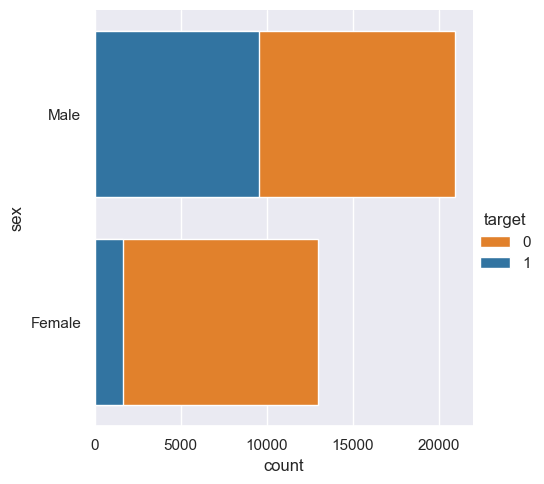

In [21]:
sns.catplot(data=df, y='sex', hue='target', kind='count', palette=['#FF7F0E', '#1F77B4'], dodge=False)
plt.show()

### Pré-processamento dos dados

Nesse momento, é importante fazer o pré-processamento dos dados para depois aplicar modelos de Machine Learning. Aqui é onde iremos escalonar dados numéricos, transformar dados categóricos em numéricos e outras transformações caso necessárias.

#### Importações

In [22]:
from sklearn.preprocessing import StandardScaler

#### Verificando a correlação dos atributos

In [24]:
df.corr()

#### Transformando dados categóricos em dados numéricos

In [25]:
occupation_mapping = {value: idx for idx, value in enumerate(df['occupation'].unique())}
race_mapping = {value: idx for idx, value in enumerate(df['race'].unique())}
sex_mapping = {value: idx for idx, value in enumerate(df['sex'].unique())}
workclass_mapping = {value: idx for idx, value in enumerate(df['workclass'].unique())}
marital_status_mapping = {value: idx for idx, value in enumerate(df['marital-status'].unique())}
native_country_mapping = {value: idx for idx, value in enumerate(df['native-country'].unique())}
relationship_mapping = {value: idx for idx, value in enumerate(df['relationship'].unique())}

In [26]:
df['occupation']     = df['occupation'].map(occupation_mapping)
df['race']           = df['race'].map(race_mapping)
df['sex']            = df['sex'].map(sex_mapping)
df['workclass']      = df['workclass'].map(workclass_mapping)
df['marital-status'] = df['marital-status'].map(marital_status_mapping)
df['native-country'] = df['native-country'].map(native_country_mapping)
df['relationship']   = df['relationship'].map(relationship_mapping)

#### Verificando novamente a correlação

In [30]:
plt.figure(figsize=(18,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

#### Subset Dataframe

In [28]:
df = df.drop(columns=['fnlwgt', 'relationship', 'native-country', 'education'])

#### Separando features e labels e escalonando os dados

In [29]:
scaler = StandardScaler()

data_raw = df.values[:, :-1]
labels = df.values[:, -1]

data = scaler.fit_transform(data_raw)

### Modelos de Machine Learning Básicos

Inicialmente, é importante estabelecer uma base com modelos simples, para posteriormente buscar melhorias. Nesse sentido, aqui iremos aplicar alguns modelos simples de aprendizado de máquina, utilizando classificadores como KNN e Decision Tree.

#### Importações

In [31]:
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score